In [1]:
import idx2numpy as idx2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

<h3>Conjunto de dados</h3>

In [2]:
train_images = idx2.convert_from_file('C:\\Users\\saori\\Downloads\\FAD\\train-images.idx3-ubyte')
test_images  = idx2.convert_from_file('C:\\Users\\saori\\Downloads\\FAD\\t10k-images.idx3-ubyte')
train_labels = idx2.convert_from_file('C:\\Users\\saori\\Downloads\\FAD\\train-labels.idx1-ubyte')
test_labels  = idx2.convert_from_file('C:\\Users\\saori\\Downloads\\FAD\\t10k-labels.idx1-ubyte')

In [3]:
X_imagens = np.concatenate((train_images, test_images), axis=0)
y_labels = np.concatenate((train_labels, test_labels), axis=0)

X_original_imagens = X_imagens
print(X_original_imagens.shape)

(70000, 28, 28)


<h3>Transformando em vetor</h3>

In [4]:
X_original_imagens_vetor = []

for imagem in X_original_imagens:
    nova_imagem = np.array(imagem).flatten()
    X_original_imagens_vetor.append(nova_imagem)

X_original_imagens_vetor  = np.array(X_original_imagens_vetor) 
X_original_imagens_vetor.shape

(70000, 784)

In [5]:
df = pd.DataFrame(X_original_imagens_vetor)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X=[]
for linha in X_original_imagens_vetor:
     X.append(linha/255)

In [7]:
X_original = np.array(X)
X_original

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

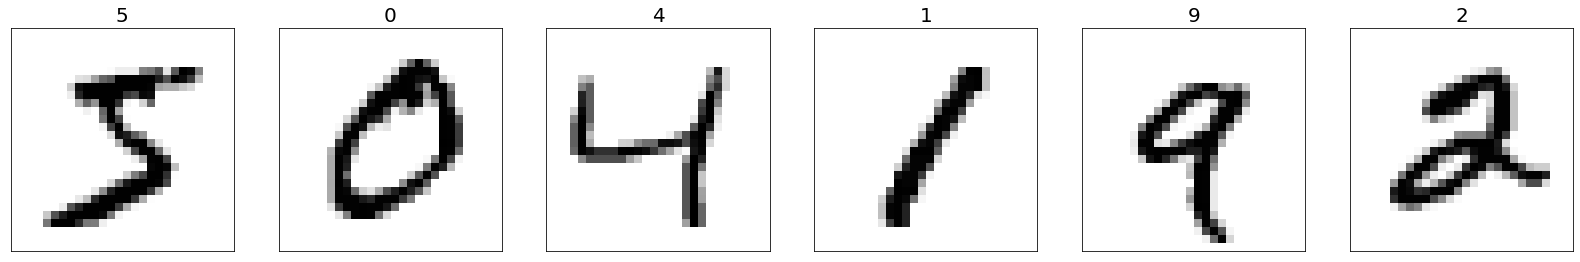

In [8]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

fig, ax = plt.subplots(1,6, figsize=(28,28))
for i, axi, in enumerate(ax.flat):
    axi.imshow(X_original[i].reshape(28,28), cmap=plt.cm.binary)
    axi.set(xticks=[], yticks=[])
    label_index = int(y_labels[i])
    axi.set_title(classes[label_index], fontsize=20)
    

<h3> Centralizar a matriz de dados original obtendo a matriz X.</h3>

<h4>Centralização de dados caracteriza-se pela subtração dos dados amostrais de cada variável, da sua média amostral.</h4>

\begin{equation}
 X_0 = X - \mu
\end{equation}

In [9]:
#centralizando dados

mean_x = np.mean(X_original, axis=0)
X_centralizado = X_original - mean_x

print(X_centralizado)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<h3>Divisão em conjunto de treinamento e conjunto de teste</h3>

In [10]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_labels, test_size=0.30, random_state=0)


In [11]:
X_train_centralizado, X_test_centralizado, y_train, y_test = train_test_split(X_centralizado, y_labels, test_size=0.30, random_state=0)

In [12]:
print('Matriz original \n', X_train_original.shape)
print('Matriz centralizada \n', X_train_centralizado.shape)
print('Teste da Matriz centralizada \n', X_test_centralizado.shape)

Matriz original 
 (49000, 784)
Matriz centralizada 
 (49000, 784)
Teste da Matriz centralizada 
 (21000, 784)


<h3>Calcular, para o respectivo banco de dados, a SVD da matriz de dados
de treinamento centralizados X.</h3>

\begin{equation}
 X = USV^T
\end{equation}

In [13]:
U, S, Vt = np.linalg.svd(X_train_centralizado, full_matrices=False)
print('Valores singulares:\n', S)
print('U \n', U)
print('Vt \n', Vt)

Valores singulares:
 [5.01961599e+02 4.30343339e+02 3.99732944e+02 3.74699089e+02
 3.54803783e+02 3.33478445e+02 2.91729115e+02 2.73838543e+02
 2.67743141e+02 2.46089651e+02 2.33561509e+02 2.29048070e+02
 2.09631106e+02 2.09329072e+02 2.01872996e+02 1.95814333e+02
 1.84948856e+02 1.81372240e+02 1.75302133e+02 1.73339043e+02
 1.65963042e+02 1.61381271e+02 1.57309504e+02 1.53223363e+02
 1.51742555e+02 1.47524787e+02 1.44958622e+02 1.42881026e+02
 1.38018720e+02 1.33735053e+02 1.29931212e+02 1.28981360e+02
 1.24763452e+02 1.22935872e+02 1.21541532e+02 1.18602803e+02
 1.13874227e+02 1.12447797e+02 1.11611751e+02 1.09690273e+02
 1.08212151e+02 1.07384660e+02 1.04286610e+02 1.01209197e+02
 9.96437306e+01 9.85803360e+01 9.68917485e+01 9.49665473e+01
 9.35575872e+01 9.10590517e+01 9.04703685e+01 8.92501857e+01
 8.74280436e+01 8.60883814e+01 8.51526851e+01 8.33248739e+01
 8.31432827e+01 8.12796216e+01 8.10005773e+01 7.97131319e+01
 7.89013301e+01 7.84129409e+01 7.69597224e+01 7.56572911e+01
 7.

In [14]:
print('U = ', U.shape)
print('S = ', S.shape)
print('Vt = ', Vt.shape)

U =  (49000, 784)
S =  (784,)
Vt =  (784, 784)


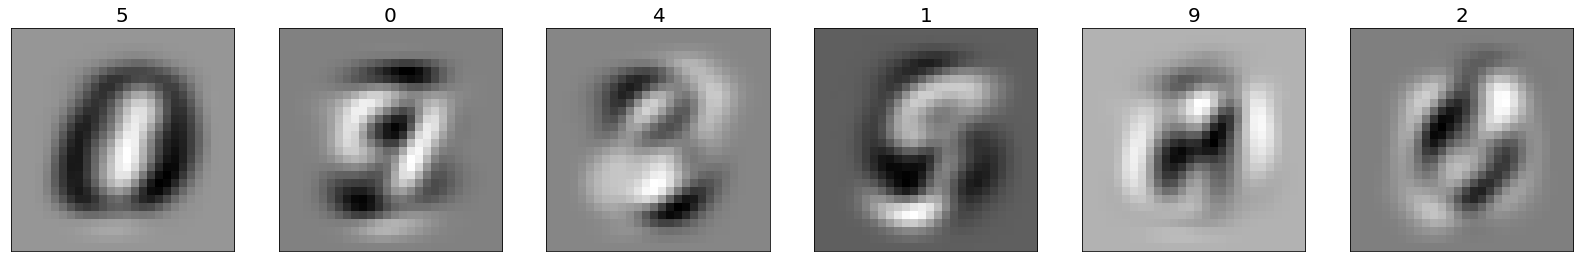

In [15]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

fig, ax = plt.subplots(1,6, figsize=(28,28))
for i, axi, in enumerate(ax.flat):
    axi.imshow(Vt[i].reshape(28,28), cmap=plt.cm.binary)
    axi.set(xticks=[], yticks=[])
    label_index = int(y_labels[i])
    axi.set_title(classes[label_index], fontsize=20)
    

<h3>Gerar um gráfico de número de valores singulares versus variabilidade acumulada.</h3>

\begin{equation}
 E = \frac{\lambda_1 + \lambda_2 + ... + \lambda_r }{\lambda_1 + \lambda_2 + ... + \lambda_n}
\end{equation}

In [16]:
#variabilidade acumulada
variabilidade_acumulada = np.cumsum(S**2) / np.sum(S**2)
print(variabilidade_acumulada)

[0.09740093 0.16899091 0.23075869 0.28503213 0.3336951  0.37668413
 0.40958305 0.43857058 0.466282   0.4896924  0.51077988 0.53106022
 0.54804788 0.56498663 0.58074018 0.59556233 0.60878519 0.62150157
 0.63338103 0.64499591 0.65564334 0.665711   0.67527704 0.68435257
 0.69325353 0.70166655 0.70978943 0.71768115 0.72504488 0.73195861
 0.73848464 0.74491561 0.75093284 0.75677508 0.76248555 0.7679232
 0.77293592 0.77782384 0.78263934 0.78729047 0.79181709 0.79627475
 0.80047891 0.80443861 0.80827676 0.81203343 0.8156625  0.81914879
 0.8225324  0.82573769 0.82890168 0.8319809  0.83493567 0.83780058
 0.84060355 0.84328748 0.84595973 0.84851352 0.85104981 0.85350611
 0.85591264 0.85828946 0.86057901 0.86279171 0.86491672 0.86696304
 0.86898845 0.87093324 0.8728437  0.87472506 0.87659077 0.87838275
 0.88014619 0.8818752  0.88351901 0.88514609 0.88675325 0.88829303
 0.88975675 0.89117559 0.89258914 0.89399112 0.89538754 0.89673472
 0.89806192 0.89936951 0.90065099 0.90190745 0.90313598 0.90433

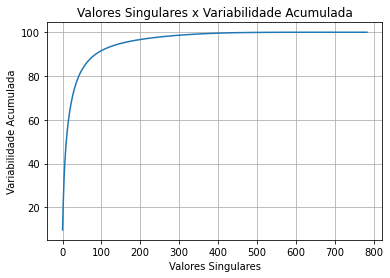

In [17]:
y_plot = 100*variabilidade_acumulada
x_plot = range(len(S))

plt.plot(x_plot, y_plot)
plt.title('Valores Singulares x Variabilidade Acumulada')
plt.xlabel('Valores Singulares')
plt.ylabel('Variabilidade Acumulada')
plt.grid(True)

<h3>Selecionar valores apropriados de variabilidade acumulada para reduzir a dimensionalidade do problema de classificação, resolvendo-o para o respectivo banco de dados.</h3>

\begin{align}
 \hat{P} = X \hat{Q} \   
\end{align}

In [18]:
def numero_autovalores(variabilidade_acumulada, variabilidade_acumulada_esperada):
    r_melhor = np.argwhere(variabilidade_acumulada >= variabilidade_acumulada_esperada)[0][0]
    return r_melhor

In [19]:
variabilidade_acumulada_esperada = 0.95
r = numero_autovalores(variabilidade_acumulada,variabilidade_acumulada_esperada)

In [20]:
print('Número de Autovalores:', r)

Número de Autovalores: 153


In [21]:
#componentes principais
#P^ = XQ^
def componentes_principais(r):
    return np.dot(X_train_centralizado, Vt[0:r,:].T), np.dot(X_test_centralizado, Vt[0:r,:].T)

<h3>Gerar um gráfico de número de valores singulares versus acurácia. Isso deve ser feito de maneira apropriada, não devendo o gráfico ser gerado em tempo superior a 24 horas.</h3>

In [22]:
X_train, X_test = componentes_principais(r)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
acc = accuracy_score(y_test, predictions)
# print(classification_report(y_test, predictions))

In [23]:
print('Variabilidade acumulada: ',variabilidade_acumulada_esperada)
print('Autovalores: ', r)
print('Acuracia: ', acc)

Variabilidade acumulada:  0.95
Autovalores:  153
Acuracia:  0.9731428571428572


In [24]:
start_time = time()
acuracia = []

for r in range(1,785):
    X_train, X_test = componentes_principais(r)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    acuracia.append(accuracy_score(y_test, predictions))

elapsed = time() - start_time
PATH = 'C:\\Users\\saori\\Downloads\\FAD\\'
np.save(PATH+'mnist_svd_knn_acc_v2.npy', acuracia)

print('Tempo de execução: {:6.2f} s.'.format(elapsed) )

Tempo de execução: 21217.85 s.


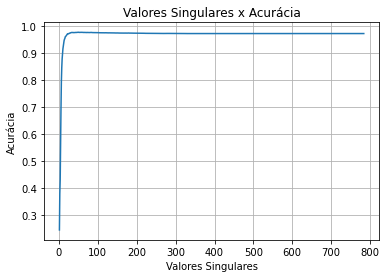

In [25]:
# y_plot = acuracia
PATH = 'C:\\Users\\saori\\Downloads\\FAD\\'
y_plot = np.load(PATH+'mnist_svd_knn_acc_v2.npy')
x_plot = range(1,785)

plt.plot(x_plot, y_plot)
plt.title('Valores Singulares x Acurácia')
plt.xlabel('Valores Singulares')
plt.ylabel('Acurácia')
plt.grid(True)

In [45]:
# print(np.load(PATH+'mnist_svd_knn_acc_v2.npy'))

In [27]:
start_time = time()
acuracia = []

for r in range(10,785,10):
    X_train, X_test = componentes_principais(r)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    acuracia.append(accuracy_score(y_test, predictions))

elapsed = time() - start_time
PATH = 'C:\\Users\\saori\\Downloads\\FAD\\'
np.save(PATH+'mnist_svd_knn_acc3.npy', acuracia)

print('Tempo de execução: {:6.2f} s.'.format(elapsed) )

Tempo de execução: 2196.75 s.


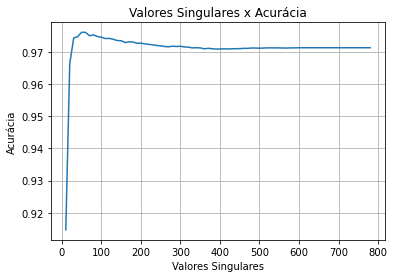

In [28]:
PATH = 'C:\\Users\\saori\\Downloads\\FAD\\'
y_plot = np.load(PATH+'mnist_svd_knn_acc3.npy')
x_plot = range(10,785,10)

plt.plot(x_plot, y_plot)
plt.title('Valores Singulares x Acurácia')
plt.xlabel('Valores Singulares')
plt.ylabel('Acurácia')
plt.grid(True)

<h3>Calcular, para o respectivo banco de dados, os autovalores de:</h3>

\begin{align}
 X^TX \ e \
\end{align}
<br> 
\begin{align}
 XX^T
\end{align}

In [30]:
#obtendo matriz de covariancia de 𝑋𝑋𝑇
𝑋𝑋T = np.dot(X_train_centralizado[:1000,:], X_train_centralizado[:1000,:].T)
cov = 𝑋𝑋T 

In [32]:
# Calculando autovalores(w) e autovetores(Q) de cov de 𝑋𝑋𝑇

w, Q = np.linalg.eigh(cov)

#revertendo a lista
index = np.argsort(w)[::-1]
w=w[index]
Q=Q[index]

print("Autovalores decrescentes de XXT: \n", w)
print("Autovetores decrescentes de XXT: \n", Q)

Autovalores decrescentes de XXT: 
 [ 5.35508861e+03  3.85813176e+03  3.43454518e+03  2.80869922e+03
  2.71984719e+03  2.27627226e+03  1.65675812e+03  1.52249238e+03
  1.41778026e+03  1.25428541e+03  1.14425091e+03  1.05795270e+03
  9.73615920e+02  8.87248344e+02  8.13597958e+02  7.64381071e+02
  7.28719248e+02  6.97198156e+02  6.62766689e+02  6.28647357e+02
  5.77389157e+02  5.22691523e+02  5.01990928e+02  4.85959351e+02
  4.69257061e+02  4.40686854e+02  4.34065861e+02  4.19456045e+02
  3.97468098e+02  3.64845237e+02  3.51929009e+02  3.47976779e+02
  3.21184140e+02  3.09144331e+02  2.99994500e+02  2.82066102e+02
  2.64613717e+02  2.59240727e+02  2.53198316e+02  2.38685528e+02
  2.31040978e+02  2.16920309e+02  2.12184110e+02  2.05152017e+02
  2.02195220e+02  1.92941915e+02  1.84237542e+02  1.79188454e+02
  1.71949719e+02  1.69318910e+02  1.60676098e+02  1.56889955e+02
  1.51485225e+02  1.48170646e+02  1.43878191e+02  1.38877503e+02
  1.36750975e+02  1.33543649e+02  1.31677186e+02  1.241

In [33]:
#obtendo matriz de covariancia 𝑋𝑇𝑋 
𝑋𝑇𝑋 = np.dot(X_train_centralizado[:1000,:].T, X_train_centralizado[:1000,:])
cov2 = 𝑋𝑇𝑋

In [35]:
# Calculando autovalores(w) e autovetores(Q) de cov de 𝑋𝑇𝑋 

w2, Q2 = np.linalg.eigh(cov2)

#revertendo a lista
index = np.argsort(w2)[::-1]
w2=w2[index]
Q2=Q2[index]

print("Autovalores decrescentes de 𝑋𝑇𝑋: \n", w2)
print("Autovetores decrescentes de 𝑋𝑇𝑋: \n", Q2)

Autovalores decrescentes de 𝑋𝑇𝑋: 
 [ 5.35508861e+03  3.85813176e+03  3.43454518e+03  2.80869922e+03
  2.71984719e+03  2.27627226e+03  1.65675812e+03  1.52249238e+03
  1.41778026e+03  1.25428541e+03  1.14425091e+03  1.05795270e+03
  9.73615920e+02  8.87248344e+02  8.13597958e+02  7.64381071e+02
  7.28719248e+02  6.97198156e+02  6.62766689e+02  6.28647357e+02
  5.77389157e+02  5.22691523e+02  5.01990928e+02  4.85959351e+02
  4.69257061e+02  4.40686854e+02  4.34065861e+02  4.19456045e+02
  3.97468098e+02  3.64845237e+02  3.51929009e+02  3.47976779e+02
  3.21184140e+02  3.09144331e+02  2.99994500e+02  2.82066102e+02
  2.64613717e+02  2.59240727e+02  2.53198316e+02  2.38685528e+02
  2.31040978e+02  2.16920309e+02  2.12184110e+02  2.05152017e+02
  2.02195220e+02  1.92941915e+02  1.84237542e+02  1.79188454e+02
  1.71949719e+02  1.69318910e+02  1.60676098e+02  1.56889955e+02
  1.51485225e+02  1.48170646e+02  1.43878191e+02  1.38877503e+02
  1.36750975e+02  1.33543649e+02  1.31677186e+02  1.241

In [36]:
def maxDiff(A,B):
    mx = np.max(A-B)
    mn = np.min(A-B)
    return max(abs(mn), abs(mx))

In [38]:
maxDiff(w[:500], w2[:500])

1.8189894035458565e-12

<h3>Comparar, para o respectivo banco de dados, a matriz de autovetores de </h3>
<br>
\begin{align}
 X^TX 
\end{align}
<br>
 <h3> e a matriz de vetores singulares direitos, isto é,   </h3>
 <br>
\begin{align}
 V em \ X = USV^T.
\end{align}
<h3> Atenção para com os sentidos dos vetores.</h3>

In [52]:
U, S, Vt = np.linalg.svd(X_train_centralizado, full_matrices=False)
print('Valores singulares:\n', S)
print('U \n', U)
print('Vt \n', Vt)

Valores singulares:
 [5.01961599e+02 4.30343339e+02 3.99732944e+02 3.74699089e+02
 3.54803783e+02 3.33478445e+02 2.91729115e+02 2.73838543e+02
 2.67743141e+02 2.46089651e+02 2.33561509e+02 2.29048070e+02
 2.09631106e+02 2.09329072e+02 2.01872996e+02 1.95814333e+02
 1.84948856e+02 1.81372240e+02 1.75302133e+02 1.73339043e+02
 1.65963042e+02 1.61381271e+02 1.57309504e+02 1.53223363e+02
 1.51742555e+02 1.47524787e+02 1.44958622e+02 1.42881026e+02
 1.38018720e+02 1.33735053e+02 1.29931212e+02 1.28981360e+02
 1.24763452e+02 1.22935872e+02 1.21541532e+02 1.18602803e+02
 1.13874227e+02 1.12447797e+02 1.11611751e+02 1.09690273e+02
 1.08212151e+02 1.07384660e+02 1.04286610e+02 1.01209197e+02
 9.96437306e+01 9.85803360e+01 9.68917485e+01 9.49665473e+01
 9.35575872e+01 9.10590517e+01 9.04703685e+01 8.92501857e+01
 8.74280436e+01 8.60883814e+01 8.51526851e+01 8.33248739e+01
 8.31432827e+01 8.12796216e+01 8.10005773e+01 7.97131319e+01
 7.89013301e+01 7.84129409e+01 7.69597224e+01 7.56572911e+01
 7.

In [60]:
maxDiff(abs(Vt.T), abs(Q2))

1.0

<h3>Comparar, para o respectivo banco de dados, a matriz Q de autovetores de </h3>
<br>
\begin{align}
 XX^T 
\end{align}    
<h3>e a matriz de vetores singulares esquerdos, isto é, </h3>
 <br>
\begin{align}
 U em \ X = USV^T 
\end{align}
<h3> Justifique por que as duas matrizes são diferentes, mas as submatrizes </h3>
    
 <br>
\begin{align}
U[:; 0 : t] \ e \ Q[:; 0 : t] 
\end{align}
 
<h3>são iguais (t é o índice do primeiro autovalor nulo).</h3>

In [64]:
print(w.astype('float16'))

[ 5.3560e+03  3.8580e+03  3.4340e+03  2.8080e+03  2.7200e+03  2.2760e+03
  1.6570e+03  1.5220e+03  1.4180e+03  1.2540e+03  1.1440e+03  1.0580e+03
  9.7350e+02  8.8700e+02  8.1350e+02  7.6450e+02  7.2850e+02  6.9700e+02
  6.6300e+02  6.2850e+02  5.7750e+02  5.2250e+02  5.0200e+02  4.8600e+02
  4.6925e+02  4.4075e+02  4.3400e+02  4.1950e+02  3.9750e+02  3.6475e+02
  3.5200e+02  3.4800e+02  3.2125e+02  3.0925e+02  3.0000e+02  2.8200e+02
  2.6450e+02  2.5925e+02  2.5325e+02  2.3862e+02  2.3100e+02  2.1688e+02
  2.1212e+02  2.0512e+02  2.0225e+02  1.9300e+02  1.8425e+02  1.7925e+02
  1.7200e+02  1.6938e+02  1.6062e+02  1.5688e+02  1.5150e+02  1.4812e+02
  1.4388e+02  1.3888e+02  1.3675e+02  1.3350e+02  1.3162e+02  1.2419e+02
  1.2106e+02  1.1738e+02  1.1506e+02  1.1412e+02  1.0888e+02  1.0550e+02
  1.0288e+02  1.0206e+02  9.8750e+01  9.6625e+01  9.4062e+01  9.2562e+01
  9.2312e+01  8.8375e+01  8.5750e+01  8.2000e+01  7.9938e+01  7.7938e+01
  7.6375e+01  7.4875e+01  7.2250e+01  7.0938e+01  6

In [54]:
def primeiro_autovalor_nulo(w):
    for index, element in enumerate(w.astype('float16')):
        if element == 0:
            return index 

In [55]:
t = primeiro_autovalor_nulo(w)
print(t)
U = U[:1000,:]

571


In [56]:
maxDiff(Q[:,0:t], U[:,0:t])

0.5982373622739635